In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('observedDataset1.csv')

In [3]:
df.head()

,Unnamed: 0,stationID,Days,observedTempMax,observedTempMin,observedHumidity,observedPressure,observedWind,observedRainfallcatagorical
0,0,10120,1,23.182051,10.735897,77.586207,1016.255172,3.968966,0.0
1,1,10120,2,22.997436,10.738462,78.655172,1016.424138,4.017241,0.0
2,2,10120,3,22.276923,10.566667,80.551724,1016.227586,4.306897,0.0
3,3,10120,4,22.115385,10.712821,79.862069,1016.027586,4.234483,1.0
4,4,10120,5,22.325641,10.274359,79.758621,1015.627586,4.434483,0.0


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df = df.reset_index()
df.shape

(12838, 9)

In [6]:
df.columns

Index(['index', 'stationID', 'Days', 'observedTempMax', 'observedTempMin',
       'observedHumidity', 'observedPressure', 'observedWind',
       'observedRainfallcatagorical'],
      dtype='object')

In [7]:
df['observedRainfallcatagorical'].value_counts()

1.0    9660
0.0    3150
Name: observedRainfallcatagorical, dtype: int64

In [8]:
df['observedRainfallcatagorical'].fillna(method='ffill',inplace=True,axis=0)

In [9]:
df['observedRainfallcatagorical'].value_counts()

1.0    9660
0.0    3178
Name: observedRainfallcatagorical, dtype: int64

In [10]:
df['observedHumidity'].fillna(method='ffill',inplace=True,axis=0)

In [11]:
df['observedPressure'].fillna(method='ffill',inplace=True,axis=0)

In [12]:
df['observedWind'].fillna(method='ffill',inplace=True,axis=0)

In [13]:

x = df.iloc[:, 3:8] 
x

,observedTempMax,observedTempMin,observedHumidity,observedPressure,observedWind
0,23.182051,10.735897,77.586207,1016.255172,3.968966
1,22.997436,10.738462,78.655172,1016.424138,4.017241
2,22.276923,10.566667,80.551724,1016.227586,4.306897
3,22.115385,10.712821,79.862069,1016.027586,4.234483
4,22.325641,10.274359,79.758621,1015.627586,4.434483
...,...,...,...,...,...
12833,26.633333,14.795238,67.000000,1014.000000,2.033333
12834,27.047619,14.319048,67.000000,1014.000000,2.033333
12835,27.414286,14.376190,67.000000,1014.000000,2.033333
12836,27.314286,14.476190,67.000000,1014.000000,2.033333


In [14]:
y=df.iloc[:, 8:]
y

,observedRainfallcatagorical
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
12833,0.0
12834,0.0
12835,0.0
12836,0.0


In [15]:
x.corr()

,observedTempMax,observedTempMin,observedHumidity,observedPressure,observedWind
observedTempMax,1.000000,0.866812,0.221166,-0.634708,0.298645
observedTempMin,0.866812,1.000000,0.571570,-0.785690,0.286132
observedHumidity,0.221166,0.571570,1.000000,-0.532134,0.005046
observedPressure,-0.634708,-0.785690,-0.532134,1.000000,-0.299707
observedWind,0.298645,0.286132,0.005046,-0.299707,1.000000


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [17]:
x_train.shape

(8986, 5)

In [18]:
y_train.shape

(8986, 1)

In [19]:
x_test.shape

(3852, 5)

In [23]:
RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
h=RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

<ipython-input-23-1c5c579ef9c9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  h=RF.fit(x_train,y_train)


In [24]:
accuracy_score(y_test, y_pred)

0.8917445482866043

In [25]:
RF.feature_importances_

array([0.20614132, 0.31080217, 0.11090505, 0.28331368, 0.08883778])

In [28]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(x_train,y_train)

y_pred=nb.predict(x_test)

C:\Users\shomy\anaconda3\envs\cvpr\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.8712357217030114

In [31]:
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [33]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
225/225 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.7429 - val_loss: 0.6470 - val_accuracy: 0.7553
Epoch 2/150
225/225 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7507 - val_loss: 0.5673 - val_accuracy: 0.7553
Epoch 3/150
225/225 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7507 - val_loss: 0.5617 - val_accuracy: 0.7553
Epoch 4/150
225/225 [==============================] - 0s 968us/step - loss: 0.5912 - accuracy: 0.7507 - val_loss: 0.5633 - val_accuracy: 0.7553
Epoch 5/150
225/225 [==============================] - 0s 968us/step - loss: 0.5862 - accuracy: 0.7507 - val_loss: 0.5592 - val_accuracy: 0.7553
Epoch 6/150
225/225 [==============================] - 0s 968us/step - loss: 0.5868 - accuracy: 0.7507 - val_loss: 0.5600 - val_accuracy: 0.7553
Epoch 7/150
225/225 [==============================] - 0s 963us/step - loss: 0.5844 - accuracy: 0.7507 - val_loss: 0.5591 - val_accuracy

Epoch 58/150
225/225 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8555 - val_loss: 0.2960 - val_accuracy: 0.8565
Epoch 59/150
225/225 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8492 - val_loss: 0.2956 - val_accuracy: 0.8560
Epoch 60/150
225/225 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8472 - val_loss: 0.2954 - val_accuracy: 0.8593
Epoch 61/150
225/225 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8500 - val_loss: 0.2956 - val_accuracy: 0.8571
Epoch 62/150
225/225 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8491 - val_loss: 0.2953 - val_accuracy: 0.8565
Epoch 63/150
225/225 [==============================] - 0s 988us/step - loss: 0.3210 - accuracy: 0.8516 - val_loss: 0.2955 - val_accuracy: 0.8598
Epoch 64/150
225/225 [==============================] - 0s 972us/step - loss: 0.3211 - accuracy: 0.8500 - val_loss: 0.2951 - val_accur

225/225 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8496 - val_loss: 0.2856 - val_accuracy: 0.8637
Epoch 115/150
225/225 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8541 - val_loss: 0.2818 - val_accuracy: 0.8626
Epoch 116/150
225/225 [==============================] - 0s 979us/step - loss: 0.3120 - accuracy: 0.8497 - val_loss: 0.2828 - val_accuracy: 0.8643
Epoch 117/150
225/225 [==============================] - 0s 967us/step - loss: 0.3177 - accuracy: 0.8513 - val_loss: 0.2821 - val_accuracy: 0.8626
Epoch 118/150
225/225 [==============================] - 0s 943us/step - loss: 0.3113 - accuracy: 0.8523 - val_loss: 0.2814 - val_accuracy: 0.8648
Epoch 119/150
225/225 [==============================] - 0s 895us/step - loss: 0.3066 - accuracy: 0.8514 - val_loss: 0.2824 - val_accuracy: 0.8626
Epoch 120/150
225/225 [==============================] - 0s 961us/step - loss: 0.3075 - accuracy: 0.8543 - val_loss: 0.2820 - val_accura

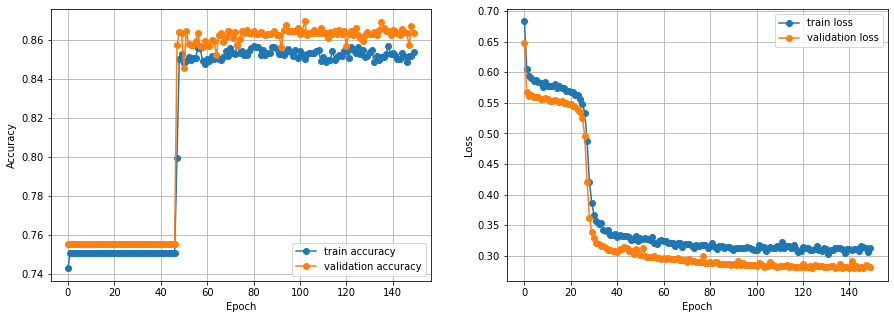

In [35]:
h=history
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

121/121 [==============================] - 0s 631us/step - loss: 0.2722 - accuracy: 0.8733

Test Accuracy: 0.8733125925064087

Test Loss: 0.27216580510139465
